In [1]:
# Reading in a data file

import pandas as pd
df = pd.read_csv('E:/DataCamp/8. Pandas Foundations/5. Datasets/NOAA_QCLCD_2011_hourly_13904.txt')
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


In [2]:
# Re-assigning column names

In [3]:
# Column labels

column_labels= 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [4]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')


In [5]:
# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list
df.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


In [6]:
#List of non necessary columns 
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [7]:
# Remove the appropriate columns: df_dropped

df_dropped = df.drop(list_to_drop,axis='columns')

In [8]:
# Print the output of df_dropped.head()

print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

In [9]:
# Convert the date column to string: df_dropped['date']

df_dropped['date'] = df_dropped['date'].astype(str)
df_dropped['date'].head()

0    20110101
1    20110101
2    20110101
3    20110101
4    20110101
Name: date, dtype: object

In [10]:
# Pad leading zeros to the Time column: df_dropped['Time']

df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
df_dropped['Time'].head()

0    0153
1    0253
2    0353
3    0453
4    0553
Name: Time, dtype: object

In [11]:
# Concatenate the new date and Time columns: date_string

date_string = df_dropped['date']+df_dropped['Time']
date_string.head()

0    201101010153
1    201101010253
2    201101010353
3    201101010453
4    201101010553
dtype: object

In [12]:
# Convert the date_string Series to datetime: date_times

date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

In [13]:
# Set the index to be the new date_times container: df_clean

df_clean = df_dropped.set_index(date_times)

In [14]:
# Print the output of df_clean.head()

print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   
2011-01-01 05:53:00      10.00             49          9.4             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0

In [15]:
# ---Cleaning the numeric columns ---

In [16]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']

df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

In [17]:
# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011

print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [18]:
# Convert the wind_speed and dew_point_faren columns to numeric values

df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

In [19]:
#  ---Statistical exploratory data analysis---


In [20]:
# Print the median of the dry_bulb_faren column
print(df_clean.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [21]:
# Signal variance
# to first resample df_clean and df_climate by day and aggregate the mean temperatures. 
# then extract the temperature related columns from each - 'dry_bulb_faren' in df_clean, and 'Temperature' in df_climate - as NumPy arrays and compute the difference.

In [22]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011 (An array)
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values


daily_mean_2011.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.130435,20.739130,10.913043
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [23]:
# Sunny or cloudy
# to use Boolean selection to filter for sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

In [24]:
# Using df_clean, when is sky_condition 'CLR'?

is_sky_clear = df_clean['sky_condition']=='CLR'

In [25]:
is_sky_clear.head()

2011-01-01 01:53:00    False
2011-01-01 02:53:00    False
2011-01-01 03:53:00    False
2011-01-01 04:53:00    False
2011-01-01 05:53:00    False
Name: sky_condition, dtype: bool

In [26]:
# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

In [27]:
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [28]:
# Weekly average temperature and visibility
#  to plot the weekly average temperature and visibility as subplots

            dry_bulb_faren
2011-01-02       44.659574
2011-01-09       50.246637
2011-01-16       41.103774
2011-01-23       47.194313
2011-01-30       53.486188
                dry_bulb_faren
dry_bulb_faren             1.0


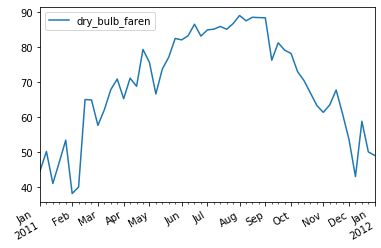

In [37]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()

print(weekly_mean.head())

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

In [30]:

# Daily hours of clear sky


In [31]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')


In [32]:
print(resampled)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]


In [33]:

#  -------Heat or humidity--------


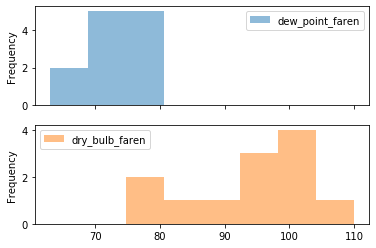

In [34]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

In [35]:

#-------Probability of high temperatures--------

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
Freq: D, Name: dry_bulb_faren, dtype: float64


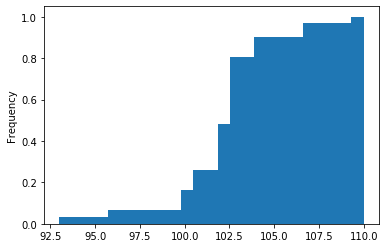

In [36]:


# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()

print(august_2011.head(3))

# Construct a CDF of august_2011_high
august_2011.plot(kind='hist', density=True, cumulative=True, bins=25)

# Display the plot
plt.show()